In [1]:
import pandas as pd
import numpy as np
from som import SelfOrganizingMaps
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Data Set 1: RGB

Randomly generated RGB data for colors, i.e., 3-D data with integer values in the range [0, 256)


In [2]:
# Hyperparameters
map_w = 200
map_h = 200
data_dims = 3
epochs = 200
t_step = 1

# Initialize a random RGB training set 
training_set = np.random.randint(256, size=(15, 3))

# Defining Map
map_dims = (map_w, map_h)
s = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
s.train(training_set)



Training iteration:  0
Training iteration:  20
Training iteration:  40
Training iteration:  60
Training iteration:  80
Training iteration:  100
Training iteration:  120
Training iteration:  140
Training iteration:  160
Training iteration:  180


In [3]:
# Display Result

s.show()     

 ## Data Set 2: MNIST
 
 To experiment further, MNIST data that consists of 28x28 pixels images of digits, 0-9 is given to SOM.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Using first 10000 images for training
train_data = mnist.train.images[:10000,:]



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
print (len(train_data))

10000


In [3]:
# Hyperparameters
map_w = 20
map_h = 20
map_dims = (map_w, map_h)
data_dims = 784
epochs = 100
t_step = 1

# Defining Map
mnist_map = SelfOrganizingMaps(map_dims, data_dims, t_step, epochs)

# Start Training
mnist_map.train(train_data)

# Converting 3D SOM to 2D image
map_matrix = np.zeros((560,560))
for i in range(map_w):
    for j in range(map_h):
        # Reshaping 768 weight vector to 28x28 matrix
        reshaped_weights = mnist_map.weights[i][j].reshape((28, 28))
        # Assigning matrix to respective position of node in lattice
        map_matrix[i*28:i*28+28, j*28:((j*28)+28)] = reshaped_weights

Training iteration:  0
Training iteration:  2
Training iteration:  4
Training iteration:  6
Training iteration:  8
Training iteration:  10
Training iteration:  12
Training iteration:  14
Training iteration:  16
Training iteration:  18
Training iteration:  20
Training iteration:  22
Training iteration:  24
Training iteration:  26
Training iteration:  28
Training iteration:  30
Training iteration:  32
Training iteration:  34
Training iteration:  36
Training iteration:  38
Training iteration:  40
Training iteration:  42
Training iteration:  44
Training iteration:  46
Training iteration:  48
Training iteration:  50
Training iteration:  52
Training iteration:  54
Training iteration:  56
Training iteration:  58
Training iteration:  60
Training iteration:  62
Training iteration:  64
Training iteration:  66
Training iteration:  68
Training iteration:  70
Training iteration:  72
Training iteration:  74
Training iteration:  76
Training iteration:  78
Training iteration:  80
Training iteration:  

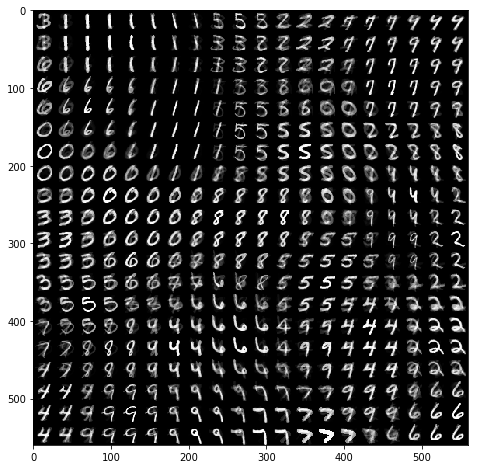

In [7]:
# Showing Image
plt.imshow(map_matrix)

## MNIST data with PCA applied

Since the training took a lot of time, we could look at the same data after applying PCA to the data.